In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from io import StringIO
import seaborn as sns
import warnings # ignore warnings 
warnings.filterwarnings("ignore")

In [2]:
Accidents = pd.read_csv('US_Accidents_Dec20.csv')

In [6]:
Accidents.tail()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
4232536,A-4239402,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,...,False,False,False,False,False,False,Day,Day,Day,Day
4232537,A-4239403,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,...,False,False,False,False,False,False,Day,Day,Day,Day
4232538,A-4239404,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,...,False,False,False,False,False,False,Day,Day,Day,Day
4232539,A-4239405,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,...,False,False,False,False,False,False,Day,Day,Day,Day
4232540,A-4239406,Bing,NaN,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,...,False,False,False,False,False,False,Day,Day,Day,Day


# Top States, Cities and Counties with maximum number of accidents

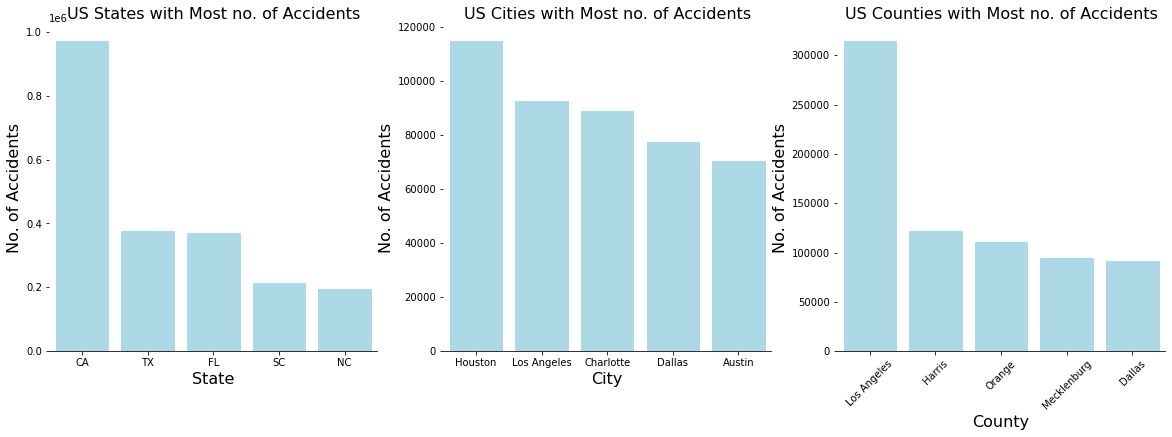

In [3]:
getstates = Accidents[['ID','State']].groupby('State').agg({'ID' : 'count' })
States = getstates.sort_values(by='ID',ascending=False)

getcounty = Accidents[[ 'County','ID']].groupby([ 'County']).count()
Counties = getcounty.sort_values(by='ID' , ascending = False)

getcity = Accidents[['City','ID']].groupby(['City']).count()
Cities = getcity.sort_values(by='ID' , ascending = False)

fig , (axis1, axis2, axis3) = plt.subplots(1,3,figsize=(20,6))

bar = sns.barplot(x=States[:5].index , y=States['ID'][:5],Color='lightblue' , edgecolor = 'black',ax=axis1 )
sns.despine(left = True )
axis1.set_xlabel("State",size= 16 )
axis1.set_ylabel("No. of Accidents" , fontdict = {'fontsize':16 , 'color':'Black'})
axis1.set_title('US States with Most no. of Accidents', fontdict = {'fontsize':16 , 'color':'black'})

bar = sns.barplot(x=Cities[:5].index , y=Cities['ID'][:5],Color='lightblue' ,  edgecolor = 'black',ax=axis2)
sns.despine(left = True )
axis2.set_xlabel("City", size= 16 )
axis2.set_ylabel("No. of Accidents", fontdict = {'fontsize':16 , 'color':'Black'})
axis2.set_title('US Cities with Most no. of Accidents', fontdict = {'fontsize':16 , 'color':'black'})
plt.xticks(rotation = 45)

bar = sns.barplot(x=Counties[:5].index , y=Counties['ID'][:5],Color='lightblue' ,  edgecolor = 'black',ax=axis3)
sns.despine(left = True )
axis3.set_xlabel("County",size= 16 )
axis3.set_ylabel("No. of Accidents",  fontdict = {'fontsize':16 , 'color':'Black'})
axis3.set_title('US Counties with Most no. of Accidents', fontdict = {'fontsize':16 , 'color':'black'})
plt.xticks(rotation = 45)
fig.show()

# Weather conditions when maximum accidents occured and how long it took to clear different severity accidents

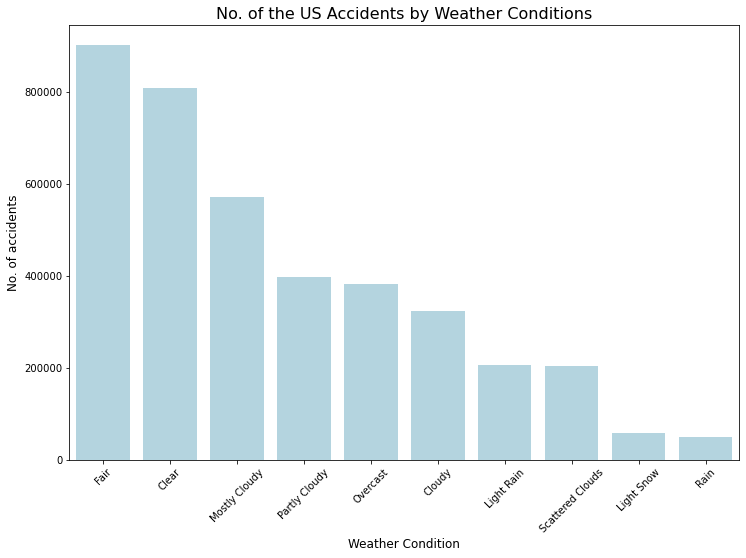

In [5]:
Weather_Condition = Accidents.Weather_Condition.value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,8))
plt.title('No. of the US Accidents by Weather Conditions', fontsize=16)
plt.ylabel('No. of accidents',  fontsize=12)
plt.xlabel('Weather Condition', fontsize=12)
sns.barplot(y=Weather_Condition.values, x=Weather_Condition.index, color='lightblue')
plt.xticks(rotation = 45)
plt.show()

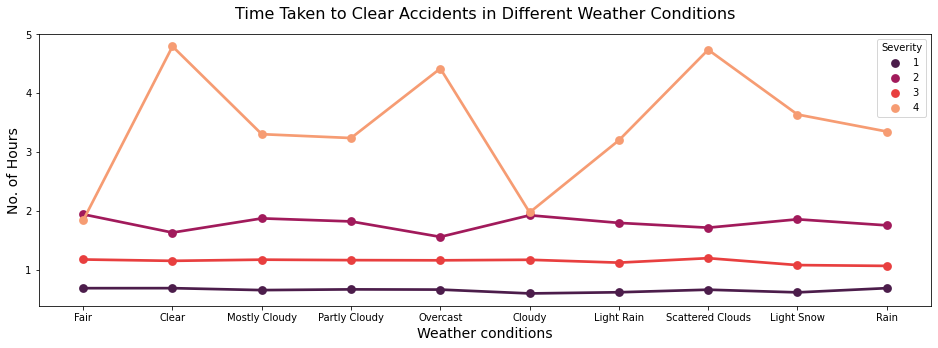

In [8]:
Start_Time= pd.to_datetime(Accidents['Start_Time'])
End_Time = pd.to_datetime(Accidents['End_Time'])
TimeDifference = End_Time - Start_Time
Accidents['DelayTime'] = round(TimeDifference.dt.seconds/3600,1)
Weather_Condition = Accidents.Weather_Condition.value_counts().sort_values(ascending=False).head(10)

fig, axis1 = plt.subplots(1,1,figsize=(16,5))
ax1 = sns.pointplot(y='DelayTime',x='Weather_Condition',data=Accidents[['Weather_Condition','DelayTime', 'Severity']],
                  palette='rocket',ax= axis1, hue = 'Severity', ci=None, order= Weather_Condition.index, height=4, aspect=2) 

plt.xlabel("Weather conditions", fontdict = {'fontsize':14 , 'color':'Black'} )
plt.ylabel("No. of Hours", fontdict = {'fontsize':14 , 'color':'Black'} )

axis1.set_title('Time Taken to Clear Accidents in Different Weather Conditions', 
                fontdict = {'fontsize':16 , 'color':'Black'}, pad=15)

plt.show()

# Word cloud to visualize maximum frequency words

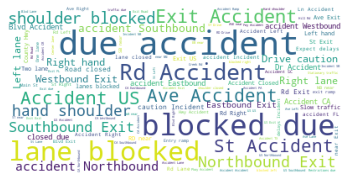

In [35]:
si=StringIO()
Accidents['Description'].apply(lambda x: si.write(str(x)))
s=si.getvalue()
si.close()
text = s

wordcloud = WordCloud().generate(text)

wordcloud = WordCloud(background_color="white",max_words=len(s),max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()